# Cultivated analysis

## Summary products
plotting examples from cultivated and natural for each test tile for
geomedian,
fractional cover percentiles,
MADs


In [1]:
import sys

import numpy
import xarray
import datacube
from datacube.storage import masking
from datacube.helpers import write_geotiff
from datacube.utils.geometry import CRS
dc = datacube.Datacube(app="nat_cult")

from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.dates as mdates

sys.path.append('../../../dea-notebooks/10_Scripts')
import DEADataHandling
import DEAPlotting
import BandIndices

In [2]:
year = '2014'
res = (-25, 25)
time = ('2014-01-01', '2014-12-31')
crs = 'EPSG:3577'


Ayr = {'nat': {'x':1520949, 'y': -2188888, 'resolution': res, 'time': time, 'crs': crs}, 
        'cult': {'x': 1584290, 'y': -2190985, 'resolution': res, 'time': time, 'crs': crs}}

Diamantina = {'nat': {'x':814002, 'y': -2792762, 'resolution': res, 'time': time, 'crs': crs}}

Gwydir = {'nat': {'x': 1689513, 'y': -3369621, 'resolution': res, 'time': time, 'crs': crs},
          'cult': {'x': 1665686, 'y': -3352804, 'resolution': res, 'time': time, 'crs': crs}}

# nat2 is an area often marked as cultivated
Leichhardt = {'nat': {'x': 856911, 'y': -1973886, 'resolution': res, 'time': time, 'crs': crs},
          'nat': {'x': 824920, 'y': -1943459, 'resolution': res, 'time': time, 'crs': crs}}

# nat2 is an area often marked as cultivated
Kakadu = {'nat': {'x': 56833, 'y': -1287098, 'resolution': res, 'time': time, 'crs': crs},
          'nat': {'x': 46649, 'y': -1315626, 'resolution': res, 'time': time, 'crs': crs}}

Hobart = {'nat': {'x': 1220151, 'y': -4795082, 'resolution': res, 'time': time, 'crs': crs},
          'cult': {'x': 1280534, 'y': -4725304, 'resolution': res, 'time': time, 'crs': crs}}
          
Perth = {'nat': {'x': -1466489, 'y': -3609352, 'resolution': res, 'time': time, 'crs': crs},
          'cult': {'x': -1491635, 'y': -3627518, 'resolution': res, 'time': time, 'crs': crs}}

Murray_Valley = {'nat': {'x': 1118783, 'y': -3959172, 'resolution': res, 'time': time, 'crs': crs},
          'cult': {'x': 1140458, 'y': -3955524, 'resolution': res, 'time': time, 'crs': crs}}

Adelaide = {'nat': {'x': 610793, 'y': -3831308, 'resolution': res, 'time': time, 'crs': crs},
          'cult': {'x': 612149, 'y': -3873784, 'resolution': res, 'time': time, 'crs': crs}}

Lake_Eyre = {'nat': {'x': 538243, 'y': -2945058, 'resolution': res, 'time': time, 'crs': crs}}

Blue_Mtns = {'nat': {'x': 1620289, 'y': -3834582, 'resolution': res, 'time': time, 'crs': crs},
          'cult': {'x': 1609202, 'y': -3858207, 'resolution': res, 'time': time, 'crs': crs}}

Aust_Alps = {'nat': {'x': 1426998, 'y': -4035477, 'resolution': res, 'time': time, 'crs': crs},
          'cult': {'x': 1485179, 'y': -4085042, 'resolution': res, 'time': time, 'crs': crs}}

Collier_Range = {'nat': {'x': -1282597, 'y': -2662345, 'resolution': res, 'time': time, 'crs': crs}}

Coorong = {'nat': {'x': 681939, 'y': -3910201, 'resolution': res, 'time': time, 'crs': crs},
          'cult': {'x': 684660, 'y': -3873241, 'resolution': res, 'time': time, 'crs': crs}}

Brisbane = {'nat': {'x': 2020190, 'y': -3109379, 'resolution': res, 'time': time, 'crs': crs},
          'cult': {'x': 2027416, 'y': -3111637, 'resolution': res, 'time': time, 'crs': crs}}

Mt_Ney = {'nat': {'x': -982699, 'y': -3645313, 'resolution': res, 'time': time, 'crs': crs},
          'cult': {'x': -974244, 'y': -3635660, 'resolution': res, 'time': time, 'crs': crs}}


'''
Climates

Koppen
Tropical - Leichhardt, Kakadu
Subtropical - Ayr, Gwydir, Brisbane
Desert - Diamantina, Lake_Eyre, Collier_Range
Grassland - Murray_Valley, Mt_Ney
Temperate - Hobart, Perth, Adelaide, Blue_Mtns, Aust_Alps, Coorong

Temp/Precip
Hot humid summer - Ayr, Leichhardt, Kakadu
Warm humid summer - Diamantina, Brisbane
Hot dry summer, mild winter - Collier_Range
Hot dry summer, cold winter - Gwydir, Murray_Valley, Lake_Eyre
Warm summer, cool winter - Perth, Adelaide, Coorong, Mt_Ney
Mild warm summer, cold winter - Hobart, Blue_Mtns, Aust_Alps

'''

'\nClimates\n\nKoppen\nTropical - Leichhardt, Kakadu\nSubtropical - Ayr, Gwydir, Brisbane\nDesert - Diamantina, Lake_Eyre, Collier_Range\nGrassland - Murray_Valley, Mt_Ney\nTemperate - Hobart, Perth, Adelaide, Blue_Mtns, Aust_Alps, Coorong\n\nTemp/Precip\nHot humid summer - Ayr, Leichhardt, Kakadu\nWarm humid summer - Diamantina, Brisbane\nHot dry summer, mild winter - Collier_Range\nHot dry summer, cold winter - Gwydir, Murray_Valley, Lake_Eyre\nWarm summer, cool winter - Perth, Adelaide, Coorong, Mt_Ney\nMild warm summer, cold winter - Hobart, Blue_Mtns, Aust_Alps\n\n'

### Geomedian

In [184]:
# Nat Geomedian
# sites = [Ayr, Diamantina, Gwydir, Leichhardt, Kakadu, Lake_Eyre, Collier_Range, Brisbane]
sites = [Hobart, Perth, Murray_Valley, Adelaide, Blue_Mtns, Aust_Alps, Coorong, Mt_Ney]
# sites = [Ayr, Diamantina, Gwydir, Leichhardt, Kakadu, Hobart, Perth, Murray_Valley, Adelaide, Lake_Eyre, Blue_Mtns, Aust_Alps, Collier_Range, Coorong, Brisbane, Mt_Ney]

GM_nat = []
for site in sites:
    query = site['nat']
    site = dc.load(product="ls8_nbart_geomedian_annual", **query)
    site = masking.mask_invalid_data(site).squeeze().drop('y').drop('x') 
    GM_nat.append(site)
GM_nat = xarray.concat(GM_nat, dim='time').drop('time')


In [185]:
# Cult Geomedian
# sites = [Ayr, Gwydir, Brisbane]
sites = [Hobart, Perth, Murray_Valley, Adelaide, Blue_Mtns, Aust_Alps, Coorong, Mt_Ney]
# sites = [Ayr, Gwydir, Hobart, Perth, Murray_Valley, Adelaide, Blue_Mtns, Aust_Alps, Coorong, Brisbane, Mt_Ney]

GM_cult = []
for site in sites:
    query = site['cult']
    site = dc.load(product="ls8_nbart_geomedian_annual", **query)
    site = masking.mask_invalid_data(site).squeeze().drop('y').drop('x') 
    GM_cult.append(site)
GM_cult = xarray.concat(GM_cult, dim='time').drop('time')


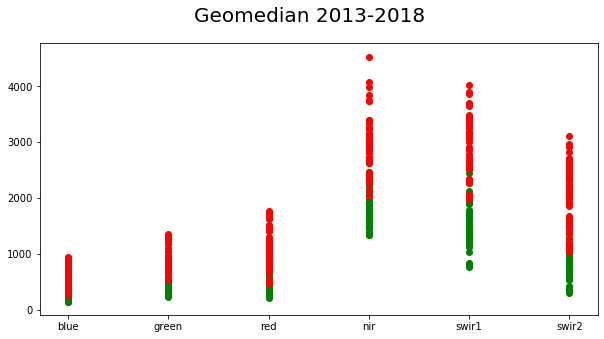

In [186]:
values_nat = numpy.count_nonzero(GM_nat.time.values)+1
values_cult = numpy.count_nonzero(GM_cult.time.values)+1

fig, ax = plt.subplots(figsize=(10, 5))
fig.suptitle('Geomedian '+year, fontsize=20)
ax.scatter((['blue']*values_nat), GM_nat.blue, color='g')
ax.scatter((['green']*values_nat), GM_nat.green, color='g')
ax.scatter((['red']*values_nat), GM_nat.red, color='g')
ax.scatter((['nir']*values_nat), GM_nat.nir, color='g')
ax.scatter((['swir1']*values_nat), GM_nat.swir1, color='g')
ax.scatter((['swir2']*values_nat), GM_nat.swir2, color='g')

ax.scatter((['blue']*values_cult), GM_cult.blue, color='r')
ax.scatter((['green']*values_cult), GM_cult.green, color='r')
ax.scatter((['red']*values_cult), GM_cult.red, color='r')
ax.scatter((['nir']*values_cult), GM_cult.nir, color='r')
ax.scatter((['swir1']*values_cult), GM_cult.swir1, color='r')
ax.scatter((['swir2']*values_cult), GM_cult.swir2, color='r')


### FC percentiles

In [181]:
# Nat FC percentiles
# sites = [Ayr, Diamantina, Gwydir, Leichhardt, Kakadu, Lake_Eyre, Collier_Range, Brisbane]
sites = [Hobart, Perth, Murray_Valley, Adelaide, Blue_Mtns, Aust_Alps, Coorong, Mt_Ney]
# sites = [Ayr, Diamantina, Gwydir, Leichhardt, Kakadu, Hobart, Perth, Murray_Valley, Adelaide, Lake_Eyre, Blue_Mtns, Aust_Alps, Collier_Range, Coorong, Brisbane, Mt_Ney]

FC_nat = []
for site in sites:
    query = site['nat']
    site = dc.load(product="fc_percentile_albers_annual", 
                 measurements=["PV_PC_10","PV_PC_50","PV_PC_90", 
                               "NPV_PC_10","NPV_PC_50", "NPV_PC_90", 
                               "BS_PC_10","BS_PC_50", "BS_PC_90"],
                     **query)
    site = masking.mask_invalid_data(site).squeeze().drop('y').drop('x') 
    FC_nat.append(site)
FC_nat = xarray.concat(FC_nat, dim='time').drop('time')


In [182]:
# Cult FC percentiles
# sites = [Ayr, Gwydir, Brisbane]
sites = [Hobart, Perth, Murray_Valley, Adelaide, Blue_Mtns, Aust_Alps, Coorong, Mt_Ney]
# sites = [Ayr, Gwydir, Hobart, Perth, Murray_Valley, Adelaide, Blue_Mtns, Aust_Alps, Coorong, Brisbane, Mt_Ney]

FC_cult = []
for site in sites:
    query = site['cult']
    site = dc.load(product="fc_percentile_albers_annual", 
                 measurements=["PV_PC_10","PV_PC_50","PV_PC_90", 
                               "NPV_PC_10","NPV_PC_50", "NPV_PC_90", 
                               "BS_PC_10","BS_PC_50", "BS_PC_90"],
                     **query)
    site = masking.mask_invalid_data(site).squeeze().drop('y').drop('x') 
    FC_cult.append(site)
FC_cult = xarray.concat(FC_cult, dim='time').drop('time')


In [183]:
values_nat = numpy.count_nonzero(FC_nat.time.values)+1
values_cult = numpy.count_nonzero(FC_cult.time.values)+1

fig, ax = plt.subplots(figsize=(10, 5))
fig.suptitle('FC '+year, fontsize=20)
ax.scatter((['PV_PC_10']*values_nat), FC_nat.PV_PC_10, color='g')
ax.scatter((['PV_PC_50']*values_nat), FC_nat.PV_PC_50, color='g')
ax.scatter((['PV_PC_90']*values_nat), FC_nat.PV_PC_90, color='g')
ax.scatter((['NPV_PC_10']*values_nat), FC_nat.NPV_PC_10, color='g')
ax.scatter((['NPV_PC_50']*values_nat), FC_nat.NPV_PC_50, color='g')
ax.scatter((['NPV_PC_90']*values_nat), FC_nat.NPV_PC_90, color='g')
ax.scatter((['BS_PC_10']*values_nat), FC_nat.BS_PC_10, color='g')
ax.scatter((['BS_PC_50']*values_nat), FC_nat.BS_PC_50, color='g')
ax.scatter((['BS_PC_90']*values_nat), FC_nat.BS_PC_90, color='g')

ax.scatter((['PV_PC_10']*values_cult), FC_cult.PV_PC_10, color='r')
ax.scatter((['PV_PC_50']*values_cult), FC_cult.PV_PC_50, color='r')
ax.scatter((['PV_PC_90']*values_cult), FC_cult.PV_PC_90, color='r')
ax.scatter((['NPV_PC_10']*values_cult), FC_cult.NPV_PC_10, color='r')
ax.scatter((['NPV_PC_50']*values_cult), FC_cult.NPV_PC_50, color='r')
ax.scatter((['NPV_PC_90']*values_cult), FC_cult.NPV_PC_90, color='r')
ax.scatter((['BS_PC_10']*values_cult), FC_cult.BS_PC_10, color='r')
ax.scatter((['BS_PC_50']*values_cult), FC_cult.BS_PC_50, color='r')
ax.scatter((['BS_PC_90']*values_cult), FC_cult.BS_PC_90, color='r')

### MADs

In [25]:
# Nat MADs
# sites = [Ayr, Diamantina, Gwydir, Leichhardt, Kakadu, Lake_Eyre, Collier_Range, Brisbane]
sites = [Hobart, Perth, Murray_Valley, Adelaide, Blue_Mtns, Aust_Alps, Coorong, Mt_Ney]
# sites = [Ayr, Diamantina, Gwydir, Leichhardt, Kakadu, Hobart, Perth, Murray_Valley, Adelaide, Lake_Eyre, Blue_Mtns, Aust_Alps, Collier_Range, Coorong, Brisbane, Mt_Ney]

MAD_nat = []
for site in sites:
    query = site['nat']
    site = dc.load(product="ls8_nbart_tmad_annual", **query)
    site = masking.mask_invalid_data(site).squeeze().drop('y').drop('x') 
    MAD_nat.append(site)
MAD_nat = xarray.concat(MAD_nat, dim='time').drop('time')


In [188]:
# Cult MADs
# sites = [Ayr, Gwydir, Brisbane]
sites = [Hobart, Perth, Murray_Valley, Adelaide, Blue_Mtns, Aust_Alps, Coorong, Mt_Ney]
# sites = [Ayr, Gwydir, Hobart, Perth, Murray_Valley, Adelaide, Blue_Mtns, Aust_Alps, Coorong, Brisbane, Mt_Ney]

MAD_cult = []
for site in sites:
    query = site['cult']
    site = dc.load(product="ls8_nbart_tmad_annual", **query)
    site = masking.mask_invalid_data(site).squeeze().drop('y').drop('x') 
    MAD_cult.append(site)
MAD_cult = xarray.concat(MAD_cult, dim='time').drop('time')


In [189]:
values_nat = numpy.count_nonzero(GM_nat.time.values)+1
values_cult = numpy.count_nonzero(GM_cult.time.values)+1

fig, ax = plt.subplots(figsize=(10, 5))
fig.suptitle('MADs '+year, fontsize=20)
ax.scatter((['sdev']*values_nat), MAD_nat.sdev, color='g')
ax.scatter((['edev']*values_nat), MAD_nat.edev, color='g')
ax.scatter((['bcdev']*values_nat), MAD_nat.bcdev, color='g')

ax.scatter((['sdev']*values_cult), MAD_cult.sdev, color='r')
ax.scatter((['edev']*values_cult), MAD_cult.edev, color='r')
ax.scatter((['bcdev']*values_cult), MAD_cult.bcdev, color='r')


## Time series analysis
plotting examples from cultivated and natural for each test tile for
landsat 8,
fractional cover,
WOfS


### Landsat

In [95]:
# Nat Landsat
# sites = [Ayr, Diamantina, Gwydir, Leichhardt, Kakadu, Lake_Eyre, Collier_Range, Brisbane]
sites = [Hobart, Perth, Murray_Valley, Adelaide, Blue_Mtns, Aust_Alps, Coorong, Mt_Ney]
# sites = [Ayr, Diamantina, Gwydir, Leichhardt, Kakadu, Hobart, Perth, Murray_Valley, Adelaide, Lake_Eyre, Blue_Mtns, Aust_Alps, Collier_Range, Coorong, Brisbane, Mt_Ney]

LS_nat = []
for site in sites:
    query = site['nat']
    site = DEADataHandling.load_clearlandsat(dc=dc, query=query, 
                                                      sensors=['ls8'], 
                                                      bands_of_interest=['blue', 'green', 'red', 
                                                                         'nir', 'swir1', 'swir2'], 
                                                      masked_prop=0.5, 
                                                      mask_pixel_quality=False, 
                                                      mask_invalid_data=False)
    site = site.drop('y').drop('x') 
    LS_nat.append(site)
LS_nat = xarray.concat(LS_nat, dim='time')


Loading ls8
    Loading 9 filtered ls8 timesteps
Returning ls8 data
Loading ls8
    Loading 13 filtered ls8 timesteps
Returning ls8 data
Loading ls8
    Loading 19 filtered ls8 timesteps
Returning ls8 data
Loading ls8
    Loading 9 filtered ls8 timesteps
Returning ls8 data
Loading ls8
    Loading 10 filtered ls8 timesteps
Returning ls8 data
Loading ls8
    Loading 15 filtered ls8 timesteps
Returning ls8 data
Loading ls8
    Loading 21 filtered ls8 timesteps
Returning ls8 data
Loading ls8
    Loading 10 filtered ls8 timesteps
Returning ls8 data


In [96]:
# Cult Landsat
# sites = [Ayr, Gwydir, Brisbane]
sites = [Hobart, Perth, Murray_Valley, Adelaide, Blue_Mtns, Aust_Alps, Coorong, Mt_Ney]
# sites = [Ayr, Gwydir, Hobart, Perth, Murray_Valley, Adelaide, Blue_Mtns, Aust_Alps, Coorong, Brisbane, Mt_Ney]

LS_cult = []
for site in sites:
    query = site['cult']
    site = DEADataHandling.load_clearlandsat(dc=dc, query=query, 
                                                      sensors=['ls8'], 
                                                      bands_of_interest=['blue', 'green', 'red', 
                                                                         'nir', 'swir1', 'swir2'], 
                                                      masked_prop=0.5, 
                                                      mask_pixel_quality=False, 
                                                      mask_invalid_data=False)
    site = site.drop('y').drop('x') 
    LS_cult.append(site)
LS_cult = xarray.concat(LS_cult, dim='time')

Loading ls8
    Loading 6 filtered ls8 timesteps
Returning ls8 data
Loading ls8
    Loading 12 filtered ls8 timesteps
Returning ls8 data
Loading ls8
    Loading 17 filtered ls8 timesteps
Returning ls8 data
Loading ls8
    Loading 7 filtered ls8 timesteps
Returning ls8 data
Loading ls8
    Loading 10 filtered ls8 timesteps
Returning ls8 data
Loading ls8
    Loading 27 filtered ls8 timesteps
Returning ls8 data
Loading ls8
    Loading 29 filtered ls8 timesteps
Returning ls8 data
Loading ls8
    Loading 26 filtered ls8 timesteps
Returning ls8 data


In [97]:
# Nat FC
# sites = [Ayr, Diamantina, Gwydir, Leichhardt, Kakadu, Lake_Eyre, Collier_Range, Brisbane]
sites = [Hobart, Perth, Murray_Valley, Adelaide, Blue_Mtns, Aust_Alps, Coorong, Mt_Ney]
# sites = [Ayr, Diamantina, Gwydir, Leichhardt, Kakadu, Hobart, Perth, Murray_Valley, Adelaide, Lake_Eyre, Blue_Mtns, Aust_Alps, Collier_Range, Coorong, Brisbane, Mt_Ney]

FC_nat = []
for site in sites:
    query = site['nat']
    site = DEADataHandling.load_clearlandsat(dc=dc, query=query, 
                                                      sensors=['ls8'], 
                                                      product='fc', 
                                                      masked_prop=0.5, 
                                                      mask_pixel_quality=False, 
                                                      mask_invalid_data=False)
    site = site.drop('y').drop('x') 
    FC_nat.append(site)
FC_nat = xarray.concat(FC_nat, dim='time')

Loading ls8
    Loading 9 filtered ls8 timesteps
Returning ls8 data
Loading ls8
    Loading 13 filtered ls8 timesteps
Returning ls8 data
Loading ls8
    Loading 19 filtered ls8 timesteps
Returning ls8 data
Loading ls8
    Loading 9 filtered ls8 timesteps
Returning ls8 data
Loading ls8
    Loading 10 filtered ls8 timesteps
Returning ls8 data
Loading ls8
    Loading 15 filtered ls8 timesteps
Returning ls8 data
Loading ls8
    Loading 21 filtered ls8 timesteps
Returning ls8 data
Loading ls8
    Loading 10 filtered ls8 timesteps
Returning ls8 data


In [98]:
# Cult FC
# sites = [Ayr, Gwydir, Brisbane]
sites = [Hobart, Perth, Murray_Valley, Adelaide, Blue_Mtns, Aust_Alps, Coorong, Mt_Ney]
# sites = [Ayr, Gwydir, Hobart, Perth, Murray_Valley, Adelaide, Blue_Mtns, Aust_Alps, Coorong, Brisbane, Mt_Ney]

FC_cult = []
for site in sites:
    query = site['cult']
    site = DEADataHandling.load_clearlandsat(dc=dc, query=query, 
                                                      sensors=['ls8'], 
                                                      product='fc', 
                                                      masked_prop=0.5, 
                                                      mask_pixel_quality=False, 
                                                      mask_invalid_data=False)
    site = site.drop('y').drop('x') 
    FC_cult.append(site)
FC_cult = xarray.concat(FC_cult, dim='time')

Loading ls8
    Loading 6 filtered ls8 timesteps
Returning ls8 data
Loading ls8
    Loading 12 filtered ls8 timesteps
Returning ls8 data
Loading ls8
    Loading 17 filtered ls8 timesteps
Returning ls8 data
Loading ls8
    Loading 7 filtered ls8 timesteps
Returning ls8 data
Loading ls8
    Loading 10 filtered ls8 timesteps
Returning ls8 data
Loading ls8
    Loading 27 filtered ls8 timesteps
Returning ls8 data
Loading ls8
    Loading 29 filtered ls8 timesteps
Returning ls8 data
Loading ls8
    Loading 26 filtered ls8 timesteps
Returning ls8 data


Text(0.5, 0.98, 'FC BS 2014')

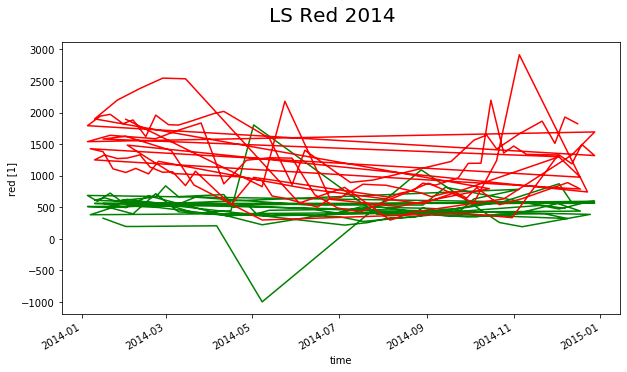

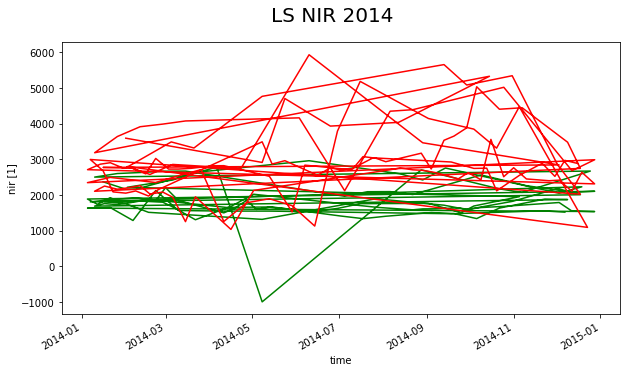

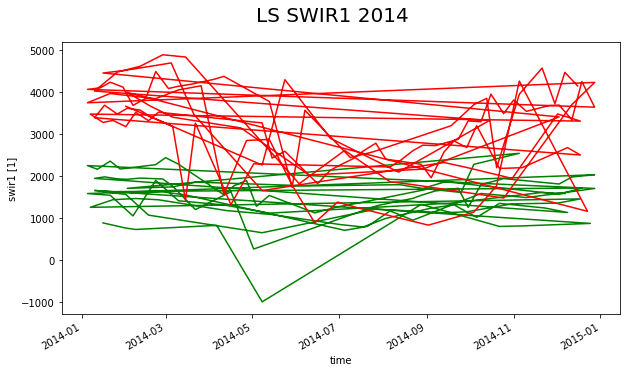

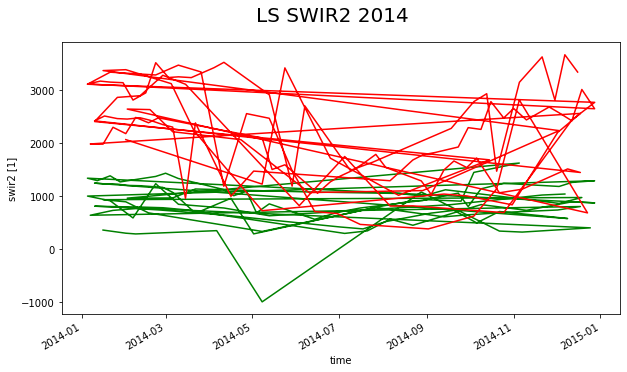

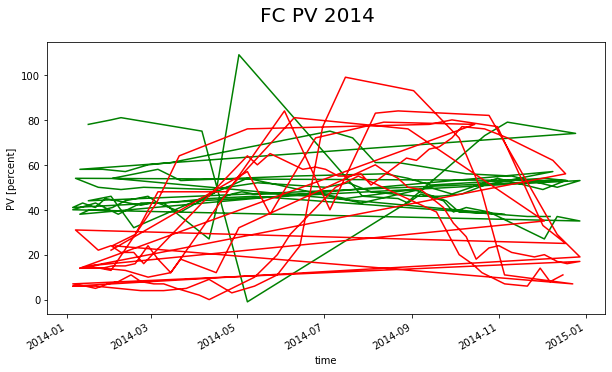

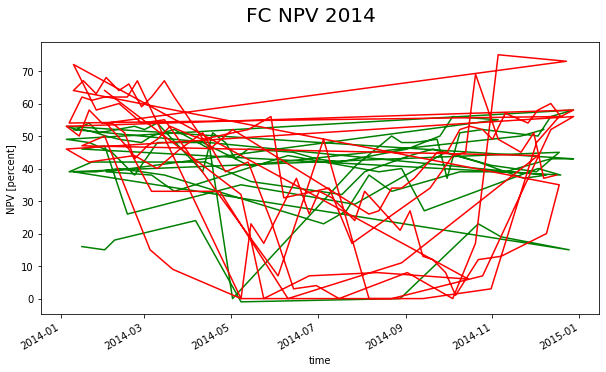

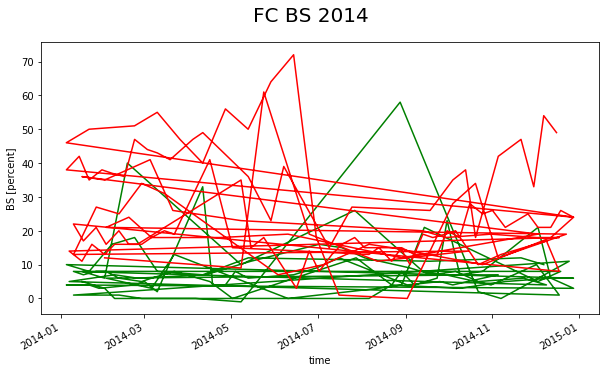

In [101]:
fig, ax = plt.subplots(figsize=(10, 5))
LS_nat.blue.plot(color='g')
LS_cult.blue.plot(color='r')
fig.suptitle('LS Blue '+year, fontsize=20)

fig, ax = plt.subplots(figsize=(10, 5))
LS_nat.green.plot(color='g')
LS_cult.green.plot(color='r')
fig.suptitle('LS Green '+year, fontsize=20)

fig, ax = plt.subplots(figsize=(10, 5))
LS_nat.red.plot(color='g')
LS_cult.red.plot(color='r')
fig.suptitle('LS Red '+year, fontsize=20)

fig, ax = plt.subplots(figsize=(10, 5))
LS_nat.nir.plot(color='g')
LS_cult.nir.plot(color='r')
fig.suptitle('LS NIR '+year, fontsize=20)

fig, ax = plt.subplots(figsize=(10, 5))
LS_nat.swir1.plot(color='g')
LS_cult.swir1.plot(color='r')
fig.suptitle('LS SWIR1 '+year, fontsize=20)

fig, ax = plt.subplots(figsize=(10, 5))
LS_nat.swir2.plot(color='g')
LS_cult.swir2.plot(color='r')
fig.suptitle('LS SWIR2 '+year, fontsize=20)

fig, ax = plt.subplots(figsize=(10, 5))
FC_nat.PV.plot(color='g')
FC_cult.PV.plot(color='r')
fig.suptitle('FC PV '+year, fontsize=20)

fig, ax = plt.subplots(figsize=(10, 5))
FC_nat.NPV.plot(color='g')
FC_cult.NPV.plot(color='r')
fig.suptitle('FC NPV '+year, fontsize=20)

fig, ax = plt.subplots(figsize=(10, 5))
FC_nat.BS.plot(color='g')
FC_cult.BS.plot(color='r')
fig.suptitle('FC BS '+year, fontsize=20)

# fig, ax = plt.subplots(figsize=(10, 5))
# WOfS_nat.water.plot(color='g')
# WOfS_cult.water.plot(color='r')
# fig.suptitle('WOfS '+year, fontsize=20)


## New MADs
plotting examples from cultivated and natural for each test tile for altered MADs

In [33]:
sys.path.append('../../../livingearth_lccs')
from le_lccs.le_ingest import gridded_ingest
import glob

folder = 'test33/'
title = 'MADs June-Dec 2015'
res_x = 25
res_y = -25

MAD_nat_sdev = []
MAD_nat_edev = []
MAD_nat_bcdev = []
MAD_cult_sdev = []
MAD_cult_edev = []
MAD_cult_bcdev = []

MAD_nat_sdev_trop = []
MAD_nat_edev_trop = []
MAD_nat_bcdev_trop = []
MAD_cult_sdev_trop = []
MAD_cult_edev_trop = []
MAD_cult_bcdev_trop = []

MAD_nat_sdev_temp = []
MAD_nat_edev_temp = []
MAD_nat_bcdev_temp = []
MAD_cult_sdev_temp = []
MAD_cult_edev_temp = []
MAD_cult_bcdev_temp = []

'''
basically load in tiff, select pixel (see below) read as nat or cult, append to list

setting pixel of choice to max_x and min_y, then min_x is 10 less and max_y is 10 less (perth, collier and mtney are min_x 10 more)
still only gives 1 pixel value
'''

Ayr = {'nat': {'target_min_x':1520939, 'target_max_x':1520949, 'target_min_y':-2188888, 'target_max_y':-2188878, 'target_pixel_size_x':res_x, 'target_pixel_size_y':res_y, 'target_crs':crs}, 
           'cult' : {'target_min_x':1584280, 'target_max_x':1584290, 'target_min_y':-2190985, 'target_max_y':-2190975, 'target_pixel_size_x':res_x, 'target_pixel_size_y':res_y, 'target_crs':crs}}

Diamantina = {'nat': {'target_min_x':813992, 'target_max_x':814002, 'target_min_y':-2792762, 'target_max_y':-2792752, 'target_pixel_size_x':res_x, 'target_pixel_size_y':res_y, 'target_crs':crs}}

Gwydir = {'nat': {'target_min_x':1689503, 'target_max_x':1689513, 'target_min_y':-3369621, 'target_max_y':-3369611, 'target_pixel_size_x':res_x, 'target_pixel_size_y':res_y, 'target_crs':crs}, 
           'cult' : {'target_min_x':1665676, 'target_max_x':1665686, 'target_min_y':-3352804, 'target_max_y':-3352794, 'target_pixel_size_x':res_x, 'target_pixel_size_y':res_y, 'target_crs':crs}}

# nat2 is an area often marked as cultivated
Leichhardt = {'nat': {'target_min_x':856901, 'target_max_x':856911, 'target_min_y':-1973886, 'target_max_y':-1973876, 'target_pixel_size_x':res_x, 'target_pixel_size_y':res_y, 'target_crs':crs}, 
           'nat2' : {'target_min_x':824910, 'target_max_x':824920, 'target_min_y':-1943459, 'target_max_y':-1943449, 'target_pixel_size_x':res_x, 'target_pixel_size_y':res_y, 'target_crs':crs}}

# nat2 is an area often marked as cultivated
Kakadu = {'nat': {'target_min_x':56823, 'target_max_x':56833, 'target_min_y':-1287098, 'target_max_y':-1287088, 'target_pixel_size_x':res_x, 'target_pixel_size_y':res_y, 'target_crs':crs}, 
           'nat2' : {'target_min_x':46639, 'target_max_x':46649, 'target_min_y':-1315626, 'target_max_y':-1315616, 'target_pixel_size_x':res_x, 'target_pixel_size_y':res_y, 'target_crs':crs}}

Hobart = {'nat': {'target_min_x':1220141, 'target_max_x':1220151, 'target_min_y':-4795082, 'target_max_y':-4795072, 'target_pixel_size_x':res_x, 'target_pixel_size_y':res_y, 'target_crs':crs}, 
           'cult' : {'target_min_x':1280524, 'target_max_x':1280534, 'target_min_y':-4725304, 'target_max_y':-4725294, 'target_pixel_size_x':res_x, 'target_pixel_size_y':res_y, 'target_crs':crs}}

Perth = {'nat': {'target_min_x':-1466499, 'target_max_x':-1466489, 'target_min_y':-3609352, 'target_max_y':-3609342, 'target_pixel_size_x':res_x, 'target_pixel_size_y':res_y, 'target_crs':crs}, 
           'cult' : {'target_min_x':-1491645, 'target_max_x':-1491635, 'target_min_y':-3627518, 'target_max_y':-3627508, 'target_pixel_size_x':res_x, 'target_pixel_size_y':res_y, 'target_crs':crs}}

Murray_Valley = {'nat': {'target_min_x':1118773, 'target_max_x':1118783, 'target_min_y':-3959172, 'target_max_y':-3959162, 'target_pixel_size_x':res_x, 'target_pixel_size_y':res_y, 'target_crs':crs}, 
           'cult' : {'target_min_x':1140448, 'target_max_x':1140458, 'target_min_y':-3955524, 'target_max_y':-3955514, 'target_pixel_size_x':res_x, 'target_pixel_size_y':res_y, 'target_crs':crs}}

Adelaide = {'nat': {'target_min_x':610783, 'target_max_x':610793, 'target_min_y':-3831308, 'target_max_y':-3831298, 'target_pixel_size_x':res_x, 'target_pixel_size_y':res_y, 'target_crs':crs}, 
           'cult' : {'target_min_x':612139, 'target_max_x':612149, 'target_min_y':-3873784, 'target_max_y':-3873774, 'target_pixel_size_x':res_x, 'target_pixel_size_y':res_y, 'target_crs':crs}}

Lake_Eyre = {'nat': {'target_min_x':538233, 'target_max_x':538243, 'target_min_y':-2945058, 'target_max_y':-2945048, 'target_pixel_size_x':res_x, 'target_pixel_size_y':res_y, 'target_crs':crs}}

Blue_Mtns = {'nat': {'target_min_x':1620279, 'target_max_x':1620289, 'target_min_y':-3834582, 'target_max_y':-3834572, 'target_pixel_size_x':res_x, 'target_pixel_size_y':res_y, 'target_crs':crs}, 
           'cult' : {'target_min_x':1609192, 'target_max_x':1609202, 'target_min_y':-3858207, 'target_max_y':-3858197, 'target_pixel_size_x':res_x, 'target_pixel_size_y':res_y, 'target_crs':crs}}

Aust_Alps = {'nat': {'target_min_x':1426988, 'target_max_x':1426998, 'target_min_y':-4035477, 'target_max_y':-4035467, 'target_pixel_size_x':res_x, 'target_pixel_size_y':res_y, 'target_crs':crs}, 
           'cult' : {'target_min_x':1485169, 'target_max_x':1485179, 'target_min_y':-4085042, 'target_max_y':-4085032, 'target_pixel_size_x':res_x, 'target_pixel_size_y':res_y, 'target_crs':crs}}

Collier_Range = {'nat': {'target_min_x':-1282607, 'target_max_x':-1282597, 'target_min_y':-2662345, 'target_max_y':-2662335, 'target_pixel_size_x':res_x, 'target_pixel_size_y':res_y, 'target_crs':crs}}

Coorong = {'nat': {'target_min_x':681929, 'target_max_x':681939, 'target_min_y':-3910201, 'target_max_y':-3910191, 'target_pixel_size_x':res_x, 'target_pixel_size_y':res_y, 'target_crs':crs}, 
           'cult' : {'target_min_x':684650, 'target_max_x':684660, 'target_min_y':-3873241, 'target_max_y':-3873231, 'target_pixel_size_x':res_x, 'target_pixel_size_y':res_y, 'target_crs':crs}}

Brisbane = {'nat': {'target_min_x':2020180, 'target_max_x':2020190, 'target_min_y':-3109379, 'target_max_y':-3109369, 'target_pixel_size_x':res_x, 'target_pixel_size_y':res_y, 'target_crs':crs}, 
           'cult' : {'target_min_x':2027406, 'target_max_x':2027416, 'target_min_y':-3111637, 'target_max_y':-3111627, 'target_pixel_size_x':res_x, 'target_pixel_size_y':res_y, 'target_crs':crs}}

Mt_Ney = {'nat': {'target_min_x':-982709, 'target_max_x':-982699, 'target_min_y':-3645313, 'target_max_y':-3645303, 'target_pixel_size_x':res_x, 'target_pixel_size_y':res_y, 'target_crs':crs}, 
           'cult' : {'target_min_x':-974254, 'target_max_x':-974244, 'target_min_y':-3635660, 'target_max_y':-3635650, 'target_pixel_size_x':res_x, 'target_pixel_size_y':res_y, 'target_crs':crs}}


var_name = "nat"
var_file = (str(glob.glob("/g/data/r78/LCCS_Aberystwyth/co6850/datacube-2nd-order-stats/"+folder+"*_15_-22.tif"))[2:-2])
site = Ayr['nat']
import_obj = gridded_ingest.LEIngestGDAL(**site)
nat = import_obj.read_to_xarray(var_file, var_name, band=1)
MAD_nat_sdev.append(nat)
MAD_nat_sdev_trop.append(nat)
nat = import_obj.read_to_xarray(var_file, var_name, band=2)
MAD_nat_edev.append(nat)
MAD_nat_edev_trop.append(nat)
nat = import_obj.read_to_xarray(var_file, var_name, band=3)
MAD_nat_bcdev.append(nat)
MAD_nat_bcdev_trop.append(nat)
var_name = "cult"
site = Ayr['cult']
import_obj = gridded_ingest.LEIngestGDAL(**site)
cult = import_obj.read_to_xarray(var_file, var_name, band=1)
MAD_cult_sdev.append(cult)
MAD_cult_sdev_trop.append(cult)
cult = import_obj.read_to_xarray(var_file, var_name, band=2)
MAD_cult_edev.append(cult)
MAD_cult_edev_trop.append(cult)
cult = import_obj.read_to_xarray(var_file, var_name, band=3)
MAD_cult_bcdev.append(cult)
MAD_cult_bcdev_trop.append(cult)


var_name = "nat"
var_file = (str(glob.glob("/g/data/r78/LCCS_Aberystwyth/co6850/datacube-2nd-order-stats/"+folder+"*_8_-28.tif"))[2:-2])
site = Diamantina['nat']
import_obj = gridded_ingest.LEIngestGDAL(**site)
nat = import_obj.read_to_xarray(var_file, var_name, band=1)
MAD_nat_sdev.append(nat)
MAD_nat_sdev_trop.append(nat)
nat = import_obj.read_to_xarray(var_file, var_name, band=2)
MAD_nat_edev.append(nat)
MAD_nat_edev_trop.append(nat)
nat = import_obj.read_to_xarray(var_file, var_name, band=3)
MAD_nat_bcdev.append(nat)
MAD_nat_bcdev_trop.append(nat)


var_name = "nat"
var_file = (str(glob.glob("/g/data/r78/LCCS_Aberystwyth/co6850/datacube-2nd-order-stats/"+folder+"*_16_-34.tif"))[2:-2])
site = Gwydir['nat']
import_obj = gridded_ingest.LEIngestGDAL(**site)
nat = import_obj.read_to_xarray(var_file, var_name, band=1)
MAD_nat_sdev.append(nat)
MAD_nat_sdev_trop.append(nat)
nat = import_obj.read_to_xarray(var_file, var_name, band=2)
MAD_nat_edev.append(nat)
MAD_nat_edev_trop.append(nat)
nat = import_obj.read_to_xarray(var_file, var_name, band=3)
MAD_nat_bcdev.append(nat)
MAD_nat_bcdev_trop.append(nat)
var_name = "cult"
site = Gwydir['cult']
import_obj = gridded_ingest.LEIngestGDAL(**site)
cult = import_obj.read_to_xarray(var_file, var_name, band=1)
MAD_cult_sdev.append(cult)
MAD_cult_sdev_trop.append(cult)
cult = import_obj.read_to_xarray(var_file, var_name, band=2)
MAD_cult_edev.append(cult)
MAD_cult_edev_trop.append(cult)
cult = import_obj.read_to_xarray(var_file, var_name, band=3)
MAD_cult_bcdev.append(cult)
MAD_cult_bcdev_trop.append(cult)


var_name = "nat"
var_file = (str(glob.glob("/g/data/r78/LCCS_Aberystwyth/co6850/datacube-2nd-order-stats/"+folder+"*_8_-20.tif"))[2:-2])
site = Leichhardt['nat']
import_obj = gridded_ingest.LEIngestGDAL(**site)
nat = import_obj.read_to_xarray(var_file, var_name, band=1)
MAD_nat_sdev.append(nat)
MAD_nat_sdev_trop.append(nat)
nat = import_obj.read_to_xarray(var_file, var_name, band=2)
MAD_nat_edev.append(nat)
MAD_nat_edev_trop.append(nat)
nat = import_obj.read_to_xarray(var_file, var_name, band=3)
MAD_nat_bcdev.append(nat)
MAD_nat_bcdev_trop.append(nat)
var_name = "nat"
site = Leichhardt['nat2']
import_obj = gridded_ingest.LEIngestGDAL(**site)
nat = import_obj.read_to_xarray(var_file, var_name, band=1)
MAD_nat_sdev.append(nat)
MAD_nat_sdev_trop.append(nat)
nat = import_obj.read_to_xarray(var_file, var_name, band=2)
MAD_nat_edev.append(nat)
MAD_nat_edev_trop.append(nat)
nat = import_obj.read_to_xarray(var_file, var_name, band=3)
MAD_nat_bcdev.append(nat)
MAD_nat_bcdev_trop.append(nat)

var_name = "nat"
var_file = (str(glob.glob("/g/data/r78/LCCS_Aberystwyth/co6850/datacube-2nd-order-stats/"+folder+"*_0_-14.tif"))[2:-2])
site = Kakadu['nat']
import_obj = gridded_ingest.LEIngestGDAL(**site)
nat = import_obj.read_to_xarray(var_file, var_name, band=1)
MAD_nat_sdev.append(nat)
MAD_nat_sdev_trop.append(nat)
nat = import_obj.read_to_xarray(var_file, var_name, band=2)
MAD_nat_edev.append(nat)
MAD_nat_edev_trop.append(nat)
nat = import_obj.read_to_xarray(var_file, var_name, band=3)
MAD_nat_bcdev.append(nat)
MAD_nat_bcdev_trop.append(nat)
var_name = "nat"
site = Kakadu['nat2']
import_obj = gridded_ingest.LEIngestGDAL(**site)
nat = import_obj.read_to_xarray(var_file, var_name, band=1)
MAD_nat_sdev.append(nat)
MAD_nat_sdev_trop.append(nat)
nat = import_obj.read_to_xarray(var_file, var_name, band=2)
MAD_nat_edev.append(nat)
MAD_nat_edev_trop.append(nat)
nat = import_obj.read_to_xarray(var_file, var_name, band=3)
MAD_nat_bcdev.append(nat)
MAD_nat_bcdev_trop.append(nat)

var_name = "nat"
var_file = (str(glob.glob("/g/data/r78/LCCS_Aberystwyth/co6850/datacube-2nd-order-stats/"+folder+"*_12_-48.tif"))[2:-2])
site = Hobart['nat']
import_obj = gridded_ingest.LEIngestGDAL(**site)
nat = import_obj.read_to_xarray(var_file, var_name, band=1)
MAD_nat_sdev.append(nat)
MAD_nat_sdev_temp.append(nat)
nat = import_obj.read_to_xarray(var_file, var_name, band=2)
MAD_nat_edev.append(nat)
MAD_nat_edev_temp.append(nat)
nat = import_obj.read_to_xarray(var_file, var_name, band=3)
MAD_nat_bcdev.append(nat)
MAD_nat_bcdev_temp.append(nat)
var_name = "cult"
site = Hobart['cult']
import_obj = gridded_ingest.LEIngestGDAL(**site)
cult = import_obj.read_to_xarray(var_file, var_name, band=1)
MAD_cult_sdev.append(cult)
MAD_cult_sdev_temp.append(cult)
cult = import_obj.read_to_xarray(var_file, var_name, band=2)
MAD_cult_edev.append(cult)
MAD_cult_edev_temp.append(cult)
cult = import_obj.read_to_xarray(var_file, var_name, band=3)
MAD_cult_bcdev.append(cult)
MAD_cult_bcdev_temp.append(cult)


var_name = "nat"
var_file = (str(glob.glob("/g/data/r78/LCCS_Aberystwyth/co6850/datacube-2nd-order-stats/"+folder+"*_-15_-37.tif"))[2:-2])
site = Perth['nat']
import_obj = gridded_ingest.LEIngestGDAL(**site)
nat = import_obj.read_to_xarray(var_file, var_name, band=1)
MAD_nat_sdev.append(nat)
MAD_nat_sdev_temp.append(nat)
nat = import_obj.read_to_xarray(var_file, var_name, band=2)
MAD_nat_edev.append(nat)
MAD_nat_edev_temp.append(nat)
nat = import_obj.read_to_xarray(var_file, var_name, band=3)
MAD_nat_bcdev.append(nat)
MAD_nat_bcdev_temp.append(nat)
var_name = "cult"
site = Perth['cult']
import_obj = gridded_ingest.LEIngestGDAL(**site)
cult = import_obj.read_to_xarray(var_file, var_name, band=1)
MAD_cult_sdev.append(cult)
MAD_cult_sdev_temp.append(cult)
cult = import_obj.read_to_xarray(var_file, var_name, band=2)
MAD_cult_edev.append(cult)
MAD_cult_edev_temp.append(cult)
cult = import_obj.read_to_xarray(var_file, var_name, band=3)
MAD_cult_bcdev.append(cult)
MAD_cult_bcdev_temp.append(cult)


var_name = "nat"
var_file = (str(glob.glob("/g/data/r78/LCCS_Aberystwyth/co6850/datacube-2nd-order-stats/"+folder+"*_11_-40.tif"))[2:-2])
site = Murray_Valley['nat']
import_obj = gridded_ingest.LEIngestGDAL(**site)
nat = import_obj.read_to_xarray(var_file, var_name, band=1)
MAD_nat_sdev.append(nat)
MAD_nat_sdev_temp.append(nat)
nat = import_obj.read_to_xarray(var_file, var_name, band=2)
MAD_nat_edev.append(nat)
MAD_nat_edev_temp.append(nat)
nat = import_obj.read_to_xarray(var_file, var_name, band=3)
MAD_nat_bcdev.append(nat)
MAD_nat_bcdev_temp.append(nat)
var_name = "cult"
site = Murray_Valley['cult']
import_obj = gridded_ingest.LEIngestGDAL(**site)
cult = import_obj.read_to_xarray(var_file, var_name, band=1)
MAD_cult_sdev.append(cult)
MAD_cult_sdev_temp.append(cult)
cult = import_obj.read_to_xarray(var_file, var_name, band=2)
MAD_cult_edev.append(cult)
MAD_cult_edev_temp.append(cult)
cult = import_obj.read_to_xarray(var_file, var_name, band=3)
MAD_cult_bcdev.append(cult)
MAD_cult_bcdev_temp.append(cult)


var_name = "nat"
var_file = (str(glob.glob("/g/data/r78/LCCS_Aberystwyth/co6850/datacube-2nd-order-stats/"+folder+"*_6_-39.tif"))[2:-2])
site = Adelaide['nat']
import_obj = gridded_ingest.LEIngestGDAL(**site)
nat = import_obj.read_to_xarray(var_file, var_name, band=1)
MAD_nat_sdev.append(nat)
MAD_nat_sdev_temp.append(nat)
nat = import_obj.read_to_xarray(var_file, var_name, band=2)
MAD_nat_edev.append(nat)
MAD_nat_edev_temp.append(nat)
nat = import_obj.read_to_xarray(var_file, var_name, band=3)
MAD_nat_bcdev.append(nat)
MAD_nat_bcdev_temp.append(nat)
var_name = "cult"
site = Adelaide['cult']
import_obj = gridded_ingest.LEIngestGDAL(**site)
cult = import_obj.read_to_xarray(var_file, var_name, band=1)
MAD_cult_sdev.append(cult)
MAD_cult_sdev_temp.append(cult)
cult = import_obj.read_to_xarray(var_file, var_name, band=2)
MAD_cult_edev.append(cult)
MAD_cult_edev_temp.append(cult)
cult = import_obj.read_to_xarray(var_file, var_name, band=3)
MAD_cult_bcdev.append(cult)
MAD_cult_bcdev_temp.append(cult)


var_name = "nat"
var_file = (str(glob.glob("/g/data/r78/LCCS_Aberystwyth/co6850/datacube-2nd-order-stats/"+folder+"*_5_-30.tif"))[2:-2])
site = Lake_Eyre['nat']
import_obj = gridded_ingest.LEIngestGDAL(**site)
nat = import_obj.read_to_xarray(var_file, var_name, band=1)
MAD_nat_sdev.append(nat)
MAD_nat_sdev_trop.append(nat)
nat = import_obj.read_to_xarray(var_file, var_name, band=2)
MAD_nat_edev.append(nat)
MAD_nat_edev_trop.append(nat)
nat = import_obj.read_to_xarray(var_file, var_name, band=3)
MAD_nat_bcdev.append(nat)
MAD_nat_bcdev_trop.append(nat)


var_name = "nat"
var_file = (str(glob.glob("/g/data/r78/LCCS_Aberystwyth/co6850/datacube-2nd-order-stats/"+folder+"*_16_-39.tif"))[2:-2])
site = Blue_Mtns['nat']
import_obj = gridded_ingest.LEIngestGDAL(**site)
nat = import_obj.read_to_xarray(var_file, var_name, band=1)
MAD_nat_sdev.append(nat)
MAD_nat_sdev_temp.append(nat)
nat = import_obj.read_to_xarray(var_file, var_name, band=2)
MAD_nat_edev.append(nat)
MAD_nat_edev_temp.append(nat)
nat = import_obj.read_to_xarray(var_file, var_name, band=3)
MAD_nat_bcdev.append(nat)
MAD_nat_bcdev_temp.append(nat)
var_name = "cult"
site = Blue_Mtns['cult']
import_obj = gridded_ingest.LEIngestGDAL(**site)
cult = import_obj.read_to_xarray(var_file, var_name, band=1)
MAD_cult_sdev.append(cult)
MAD_cult_sdev_temp.append(cult)
cult = import_obj.read_to_xarray(var_file, var_name, band=2)
MAD_cult_edev.append(cult)
MAD_cult_edev_temp.append(cult)
cult = import_obj.read_to_xarray(var_file, var_name, band=3)
MAD_cult_bcdev.append(cult)
MAD_cult_bcdev_temp.append(cult)


var_name = "nat"
var_file = (str(glob.glob("/g/data/r78/LCCS_Aberystwyth/co6850/datacube-2nd-order-stats/"+folder+"*_14_-41.tif"))[2:-2])
site = Aust_Alps['nat']
import_obj = gridded_ingest.LEIngestGDAL(**site)
nat = import_obj.read_to_xarray(var_file, var_name, band=1)
MAD_nat_sdev.append(nat)
MAD_nat_sdev_temp.append(nat)
nat = import_obj.read_to_xarray(var_file, var_name, band=2)
MAD_nat_edev.append(nat)
MAD_nat_edev_temp.append(nat)
nat = import_obj.read_to_xarray(var_file, var_name, band=3)
MAD_nat_bcdev.append(nat)
MAD_nat_bcdev_temp.append(nat)
var_name = "cult"
site = Aust_Alps['cult']
import_obj = gridded_ingest.LEIngestGDAL(**site)
cult = import_obj.read_to_xarray(var_file, var_name, band=1)
MAD_cult_sdev.append(cult)
MAD_cult_sdev_temp.append(cult)
cult = import_obj.read_to_xarray(var_file, var_name, band=2)
MAD_cult_edev.append(cult)
MAD_cult_edev_temp.append(cult)
cult = import_obj.read_to_xarray(var_file, var_name, band=3)
MAD_cult_bcdev.append(cult)
MAD_cult_bcdev_temp.append(cult)


var_name = "nat"
var_file = (str(glob.glob("/g/data/r78/LCCS_Aberystwyth/co6850/datacube-2nd-order-stats/"+folder+"*_-13_-27.tif"))[2:-2])
site = Collier_Range['nat']
import_obj = gridded_ingest.LEIngestGDAL(**site)
nat = import_obj.read_to_xarray(var_file, var_name, band=1)
MAD_nat_sdev.append(nat)
MAD_nat_sdev_trop.append(nat)
nat = import_obj.read_to_xarray(var_file, var_name, band=2)
MAD_nat_edev.append(nat)
MAD_nat_edev_trop.append(nat)
nat = import_obj.read_to_xarray(var_file, var_name, band=3)
MAD_nat_bcdev.append(nat)
MAD_nat_bcdev_trop.append(nat)


var_name = "nat"
var_file = (str(glob.glob("/g/data/r78/LCCS_Aberystwyth/co6850/datacube-2nd-order-stats/"+folder+"*_6_-40.tif"))[2:-2])
site = Coorong['nat']
import_obj = gridded_ingest.LEIngestGDAL(**site)
nat = import_obj.read_to_xarray(var_file, var_name, band=1)
MAD_nat_sdev.append(nat)
MAD_nat_sdev_temp.append(nat)
nat = import_obj.read_to_xarray(var_file, var_name, band=2)
MAD_nat_edev.append(nat)
MAD_nat_edev_temp.append(nat)
nat = import_obj.read_to_xarray(var_file, var_name, band=3)
MAD_nat_bcdev.append(nat)
MAD_nat_bcdev_temp.append(nat)
var_name = "cult"
site = Coorong['cult']
import_obj = gridded_ingest.LEIngestGDAL(**site)
cult = import_obj.read_to_xarray(var_file, var_name, band=1)
MAD_cult_sdev.append(cult)
MAD_cult_sdev_temp.append(cult)
cult = import_obj.read_to_xarray(var_file, var_name, band=2)
MAD_cult_edev.append(cult)
MAD_cult_edev_temp.append(cult)
cult = import_obj.read_to_xarray(var_file, var_name, band=3)
MAD_cult_bcdev.append(cult)
MAD_cult_bcdev_temp.append(cult)


var_name = "nat"
var_file = (str(glob.glob("/g/data/r78/LCCS_Aberystwyth/co6850/datacube-2nd-order-stats/"+folder+"*_20_-32.tif"))[2:-2])
site = Brisbane['nat']
import_obj = gridded_ingest.LEIngestGDAL(**site)
nat = import_obj.read_to_xarray(var_file, var_name, band=1)
MAD_nat_sdev.append(nat)
MAD_nat_sdev_trop.append(nat)
nat = import_obj.read_to_xarray(var_file, var_name, band=2)
MAD_nat_edev.append(nat)
MAD_nat_edev_trop.append(nat)
nat = import_obj.read_to_xarray(var_file, var_name, band=3)
MAD_nat_bcdev.append(nat)
MAD_nat_bcdev_trop.append(nat)
var_name = "cult"
site = Brisbane['cult']
import_obj = gridded_ingest.LEIngestGDAL(**site)
cult = import_obj.read_to_xarray(var_file, var_name, band=1)
MAD_cult_sdev.append(cult)
MAD_cult_sdev_trop.append(cult)
cult = import_obj.read_to_xarray(var_file, var_name, band=2)
MAD_cult_edev.append(cult)
MAD_cult_edev_trop.append(cult)
cult = import_obj.read_to_xarray(var_file, var_name, band=3)
MAD_cult_bcdev.append(cult)
MAD_cult_bcdev_trop.append(cult)


var_name = "nat"
var_file = (str(glob.glob("/g/data/r78/LCCS_Aberystwyth/co6850/datacube-2nd-order-stats/"+folder+"*_-10_-37.tif"))[2:-2])
site = Mt_Ney['nat']
import_obj = gridded_ingest.LEIngestGDAL(**site)
nat = import_obj.read_to_xarray(var_file, var_name, band=1)
MAD_nat_sdev.append(nat)
MAD_nat_sdev_temp.append(nat)
nat = import_obj.read_to_xarray(var_file, var_name, band=2)
MAD_nat_edev.append(nat)
MAD_nat_edev_temp.append(nat)
nat = import_obj.read_to_xarray(var_file, var_name, band=3)
MAD_nat_bcdev.append(nat)
MAD_nat_bcdev_temp.append(nat)
var_name = "cult"
site = Mt_Ney['cult']
import_obj = gridded_ingest.LEIngestGDAL(**site)
cult = import_obj.read_to_xarray(var_file, var_name, band=1)
MAD_cult_sdev.append(cult)
MAD_cult_sdev_temp.append(cult)
cult = import_obj.read_to_xarray(var_file, var_name, band=2)
MAD_cult_edev.append(cult)
MAD_cult_edev_temp.append(cult)
cult = import_obj.read_to_xarray(var_file, var_name, band=3)
MAD_cult_bcdev.append(cult)
MAD_cult_bcdev_temp.append(cult)



In [34]:
MAD_nat_sdev = xarray.concat(MAD_nat_sdev)
MAD_nat_edev = xarray.concat(MAD_nat_edev)
MAD_nat_bcdev = xarray.concat(MAD_nat_bcdev)
MAD_cult_sdev = xarray.concat(MAD_cult_sdev)
MAD_cult_edev = xarray.concat(MAD_cult_edev)
MAD_cult_bcdev = xarray.concat(MAD_cult_bcdev)

MAD_nat_sdev_trop = xarray.concat(MAD_nat_sdev_trop)
MAD_nat_edev_trop = xarray.concat(MAD_nat_edev_trop)
MAD_nat_bcdev_trop = xarray.concat(MAD_nat_bcdev_trop)
MAD_cult_sdev_trop = xarray.concat(MAD_cult_sdev_trop)
MAD_cult_edev_trop = xarray.concat(MAD_cult_edev_trop)
MAD_cult_bcdev_trop = xarray.concat(MAD_cult_bcdev_trop)

MAD_nat_sdev_temp = xarray.concat(MAD_nat_sdev_temp)
MAD_nat_edev_temp = xarray.concat(MAD_nat_edev_temp)
MAD_nat_bcdev_temp = xarray.concat(MAD_nat_bcdev_temp)
MAD_cult_sdev_temp = xarray.concat(MAD_cult_sdev_temp)
MAD_cult_edev_temp = xarray.concat(MAD_cult_edev_temp)
MAD_cult_bcdev_temp = xarray.concat(MAD_cult_bcdev_temp)


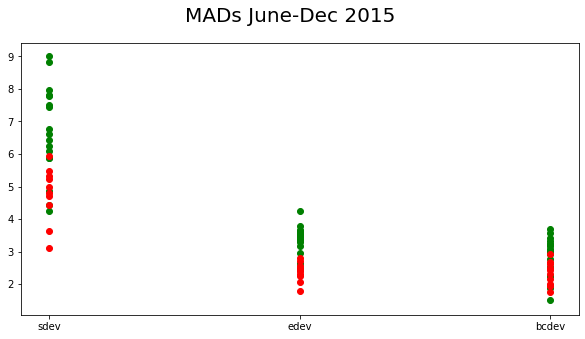

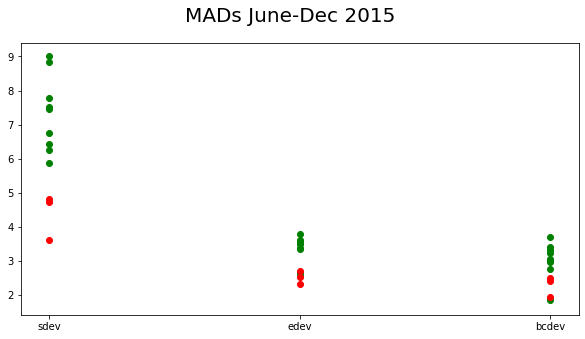

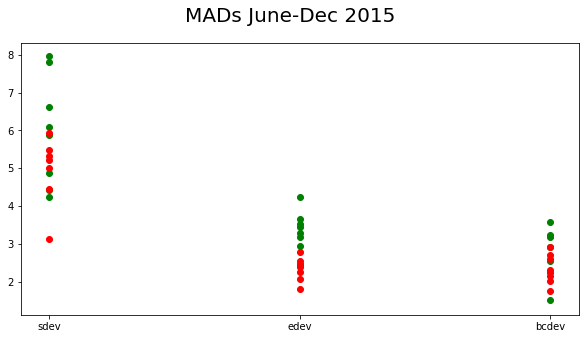

In [35]:
values_nat = numpy.count_nonzero(MAD_nat_sdev.nat.values)
values_cult = numpy.count_nonzero(MAD_cult_sdev.cult.values)

fig1, ax1 = plt.subplots(figsize=(10, 5))
fig1.suptitle(title, fontsize=20)
ax1.scatter((['sdev']*values_nat), MAD_nat_sdev.nat, color='g')
ax1.scatter((['edev']*values_nat), MAD_nat_edev.nat, color='g')
ax1.scatter((['bcdev']*values_nat), MAD_nat_bcdev.nat, color='g')

ax1.scatter((['sdev']*values_cult), MAD_cult_sdev.cult, color='r')
ax1.scatter((['edev']*values_cult), MAD_cult_edev.cult, color='r')
ax1.scatter((['bcdev']*values_cult), MAD_cult_bcdev.cult, color='r')


values_nat = numpy.count_nonzero(MAD_nat_sdev_trop.nat.values)
values_cult = numpy.count_nonzero(MAD_cult_sdev_trop.cult.values)

fig2, ax2 = plt.subplots(figsize=(10, 5))
fig2.suptitle(title, fontsize=20)
ax2.scatter((['sdev']*values_nat), MAD_nat_sdev_trop.nat, color='g')
ax2.scatter((['edev']*values_nat), MAD_nat_edev_trop.nat, color='g')
ax2.scatter((['bcdev']*values_nat), MAD_nat_bcdev_trop.nat, color='g')

ax2.scatter((['sdev']*values_cult), MAD_cult_sdev_trop.cult, color='r')
ax2.scatter((['edev']*values_cult), MAD_cult_edev_trop.cult, color='r')
ax2.scatter((['bcdev']*values_cult), MAD_cult_bcdev_trop.cult, color='r')


values_nat = numpy.count_nonzero(MAD_nat_sdev_temp.nat.values)
values_cult = numpy.count_nonzero(MAD_cult_sdev_temp.cult.values)

fig3, ax3 = plt.subplots(figsize=(10, 5))
fig3.suptitle(title, fontsize=20)
ax3.scatter((['sdev']*values_nat), MAD_nat_sdev_temp.nat, color='g')
ax3.scatter((['edev']*values_nat), MAD_nat_edev_temp.nat, color='g')
ax3.scatter((['bcdev']*values_nat), MAD_nat_bcdev_temp.nat, color='g')

ax3.scatter((['sdev']*values_cult), MAD_cult_sdev_temp.cult, color='r')
ax3.scatter((['edev']*values_cult), MAD_cult_edev_temp.cult, color='r')
ax3.scatter((['bcdev']*values_cult), MAD_cult_bcdev_temp.cult, color='r')